檔案網址
https://www.superdatascience.com/machine-learning/

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt #pyplot是次libraries
from os import listdir
from os.path import isfile,isdir,join
from os import walk


In [11]:
mypath = "Machine Learning A-Z Template Folder/Part 2 - Regression/Section 8 - Decision Tree Regression/Decision_Tree_Regression"
files = listdir(mypath)

# 遞迴列出所有子目錄與檔案
for root, dirs, files in walk(mypath):#找出資料夾內容
  print("路徑：", root)
  print("  目錄：", dirs)
  print("  檔案：", files)

for root, dirs, files in walk(mypath): #讀取絕對路徑
  for f in files:
    fullpath = join(root, f)
    print(fullpath)

路徑： Machine Learning A-Z Template Folder/Part 2 - Regression/Section 8 - Decision Tree Regression/Decision_Tree_Regression
  目錄： []
  檔案： ['.DS_Store', 'decision_tree_regression.py', 'decision_tree_regression.R', 'Position_Salaries.csv', 'regression_template.py', 'regression_template.R']
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 8 - Decision Tree Regression/Decision_Tree_Regression/.DS_Store
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 8 - Decision Tree Regression/Decision_Tree_Regression/decision_tree_regression.py
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 8 - Decision Tree Regression/Decision_Tree_Regression/decision_tree_regression.R
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 8 - Decision Tree Regression/Decision_Tree_Regression/Position_Salaries.csv
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 8 - Decision Tree Regression/Decision_Tree_Regression/regression_template.py
Machin

In [12]:
datapath= mypath + '/'+ 'Position_Salaries.csv' #可列出資料位置
testdata = pd.read_csv(datapath)

In [13]:
testdata 
#可看出是非線性
#只要後兩行來做訓練

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [16]:
x = testdata.iloc[:, 1:2].values 
#左邊的 : 是整行line（0-9）
#右邊的:-1是列columns,此數據x的:-1跟 
#0雖然一樣，但在最後fit時會影響到，因為訓練時要使用x要用matrix,y要用vector
y = testdata.iloc[:, 2:3].values

In [17]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

SVR

step 1 feature scaling

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)
#為何要做feature scaling?-->是因為要分類嗎？
#另外y要先改成matrix才能進入

y = y.reshape(10)
np.shape(y)
#reshape轉回vactor
y

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [35]:
pred_y = regressor.predict(x)

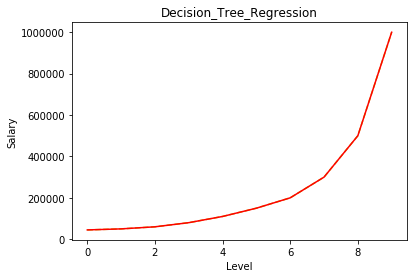

In [36]:

plt.plot(pred_y,'y--')
plt.plot(y,'r')
plt.title('Decision_Tree_Regression')
plt.xlabel(testdata.columns[1])
plt.ylabel(testdata.columns[2])
plt.show()
#目前SVR還不能完整的fit，如最高點的CEO

predicting a new result with Linear regresstion

In [37]:
y_pred = regressor.predict(3)
#此部分，因為數字做過調整，所以輸入的數字也要調整
#輸入的直要是矩陣

In [38]:
ndata = 

array([ 60000.])

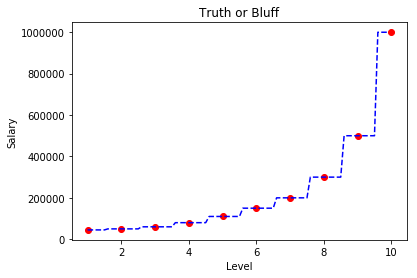

In [40]:
#可用以下來優化
x_grid = np.arange(min(x),max(x),0.1) #把x切細
x_grid = x_grid.reshape((len(x_grid),1)) #轉成matrix
plt.scatter(x,y,color = 'red')
plt.plot(x_grid,regressor.predict(x_grid),'b--')

plt.title('Truth or Bluff')
plt.xlabel(testdata.columns[1])
plt.ylabel(testdata.columns[2])
plt.show()

#因為是非連續的資料，所以要有梯狀